In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
# import mplfinance as mpf
from ta import add_all_ta_features
from ta.utils import dropna
import talib

### Wycztanie danych i czyszczenie

In [3]:
df = pd.read_csv('usdpln_d.csv')

df = dropna(df)

df['Date'] = pd.to_datetime(df['Date'])
df["Volume"] = 0

df.set_index('Date', inplace=True)

df

,Open,High,Low,Close,Volume
Date,,,,,
2025-01-02,4.13170,4.18084,4.11415,4.16199,0
2025-01-03,4.16287,4.16440,4.14055,4.14160,0
2025-01-06,4.14605,4.15105,4.07145,4.09350,0
2025-01-07,4.09320,4.12240,4.07355,4.11855,0
2025-01-08,4.11855,4.16060,4.11635,4.14290,0
...,...,...,...,...,...
2025-03-25,3.86184,3.87118,3.84367,3.85911,0
2025-03-26,3.85918,3.89948,3.85600,3.89725,0
2025-03-27,3.89727,3.89855,3.86835,3.87584,0


### Dodawanie wskaźników technicznych

C:\Users\megaz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\ta\trend.py:1030: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self._psar[i] = high2


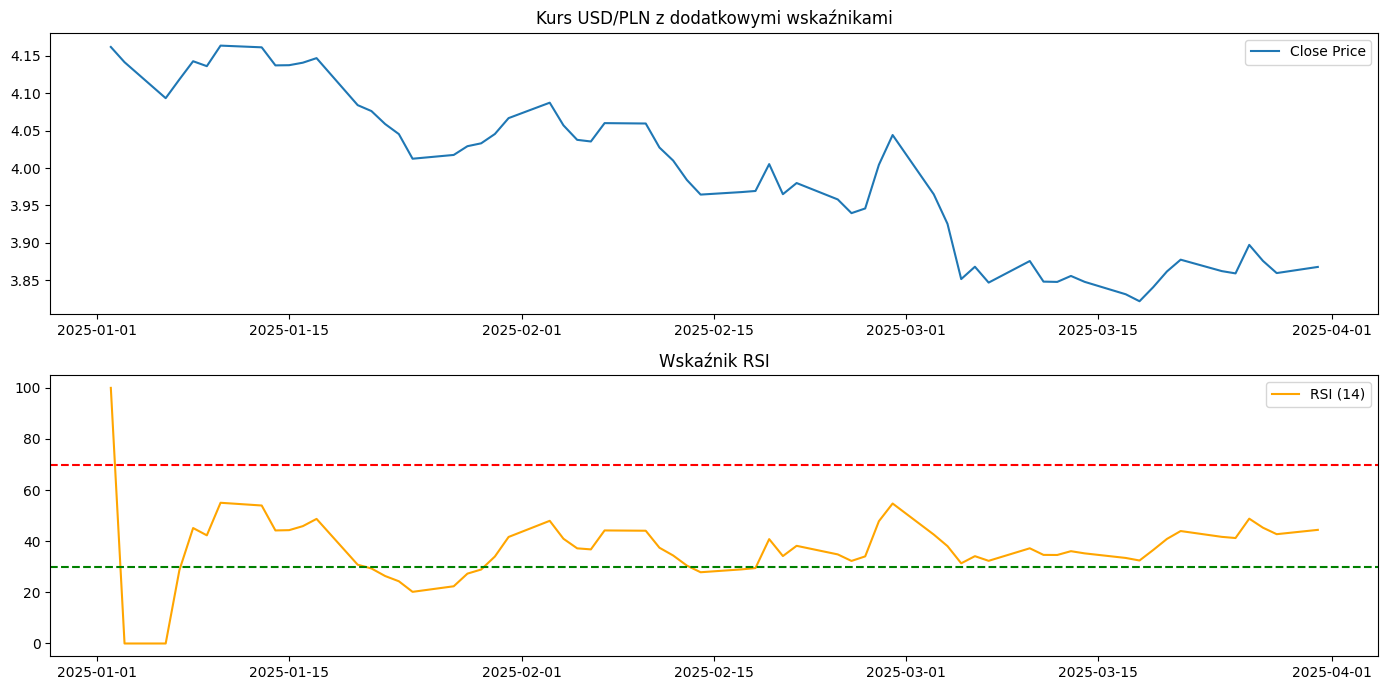

In [12]:
df = add_all_ta_features(
    df, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)

plt.figure(figsize=(14,7))

plt.subplot(2,1,1)
plt.plot(df['Close'], label='Close Price')
plt.title('Kurs USD/PLN z dodatkowymi wskaźnikami')
plt.legend()

plt.subplot(2,1,2)
plt.plot(df['momentum_rsi'], label='RSI (14)', color='orange')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('Wskaźnik RSI')
plt.legend()

plt.tight_layout()
plt.savefig('technical_analysis_usdpln.png')
plt.show()

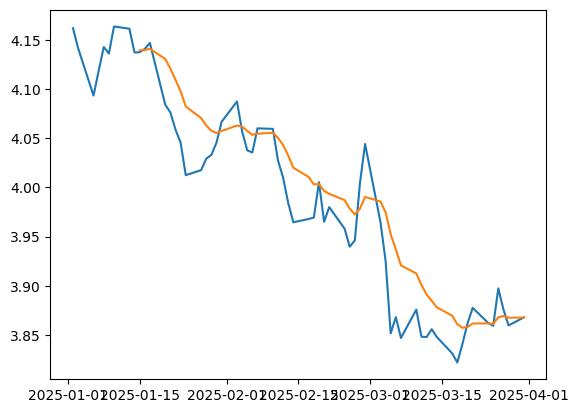

In [13]:
df['EMA_100'] = talib.EMA(df['Close'], 10)
df['LINEARREG'] = talib.LINEARREG(df['Close'], 10)
plt.plot(df['Close'])
plt.plot(df['EMA_100'])

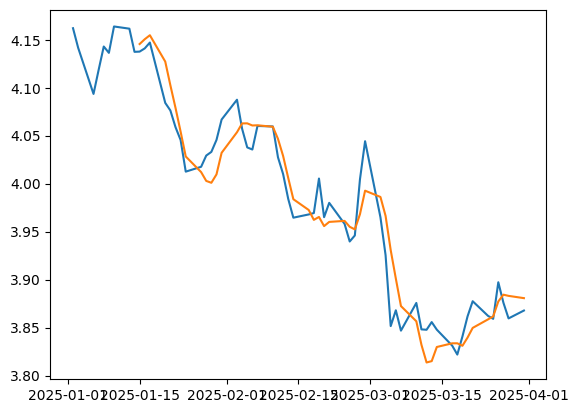

In [14]:
plt.plot(df['Close'])
plt.plot(df['LINEARREG'])

<BarContainer object of 63 artists>

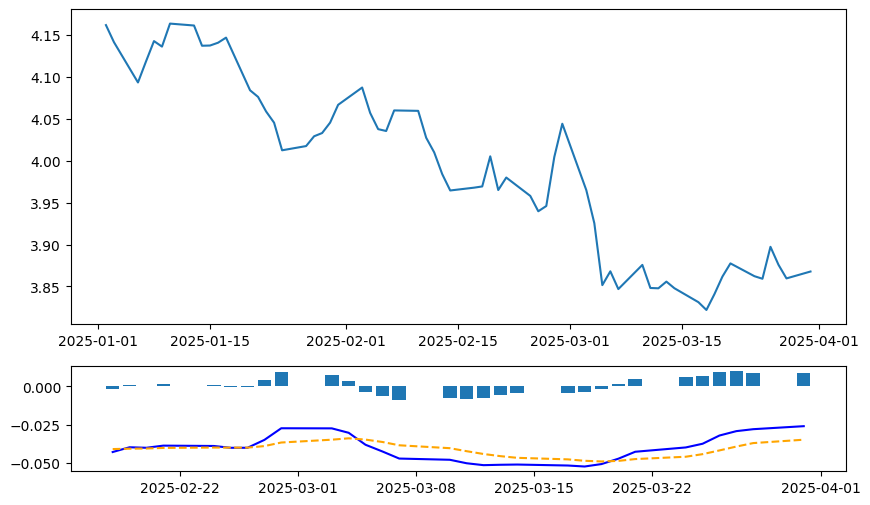

In [7]:
macd, macd_signal, macd_hist = talib.MACD(df['Close'])
fig, axs = plt.subplots(2, 1, gridspec_kw={"height_ratios": [3, 1]}, figsize=(10,6))
c = ["red" if cl < 0 else "green" for cl in macd_hist]

axs[0].plot(df['Close'])
axs[1].plot(macd, 'b-')
axs[1].plot(macd_signal, '--', color="orange")
axs[1].bar(macd_hist.index, macd_hist)

In [8]:
# df zawiera kolumny: Open, High, Low, Close
df['Engulfing'] = talib.CDLENGULFING(df['Open'], df['High'], df['Low'], df['Close'])
df['Doji'] = talib.CDLDOJI(df['Open'], df['High'], df['Low'], df['Close'])
df['Hammer'] = talib.CDLHAMMER(df['Open'], df['High'], df['Low'], df['Close'])
# Filtrujemy dni z formacją Engulfing
formacje = df[df['Engulfing'] != 0]

# Formatujemy indeks datetime do ładnego formatu string i wypisujemy jako listę
formatted_dates = formacje.index.to_series().dt.strftime('%d-%m-%Y').to_list()

formacje

,Open,High,Low,Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,...,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr,EMA_100,LINEARREG,Engulfing,Doji,Hammer
Date,,,,,,,,,,,,,,,,,,,,,
2025-01-16,4.13575,4.15810,4.13140,4.14095,0,0.0,0,0.0,-0.0,0.0,...,0.0,4.143556,0.080965,0.080932,-0.505527,4.139770,4.150499,100,0,0
2025-01-28,4.01755,4.04515,4.01730,4.02925,0,0.0,0,0.0,-0.0,0.0,...,0.0,4.052443,0.291222,0.290799,-3.189340,4.063079,4.002825,80,0,0
2025-02-20,4.00633,4.01110,3.96136,3.96505,0,0.0,0,0.0,-0.0,0.0,...,0.0,4.006470,-1.004918,-1.010002,-4.731871,3.996490,3.955736,-100,0,0
2025-03-10,3.84179,3.88521,3.83534,3.87565,0,0.0,0,0.0,-0.0,0.0,...,0.0,3.959948,0.750236,0.747436,-6.879882,3.912421,3.856552,100,0,0
2025-03-13,3.84771,3.88020,3.84427,3.85570,0,0.0,0,0.0,-0.0,0.0,...,0.0,3.939712,0.207656,0.207441,-7.359220,3.884653,3.815013,80,0,0
2025-03-19,3.82145,3.86209,3.82018,3.84071,0,0.0,0,0.0,-0.0,0.0,...,0.0,3.894769,0.493478,0.492265,-7.719384,3.857139,3.831011,100,0,0


### Wykrywanie wzorców kupna i sprzedaży na podstawie wskaźników technicznych

In [9]:
# Inicjalizacja kolumn sygnałów
df['Signal'] = 0
df['Signal_Type'] = ''

# A. SYGNAŁY Z RSI
rsi = df['momentum_rsi']
df.loc[(rsi < 30), 'Signal'] = 1  # Kupno (oversold)
df.loc[(rsi < 30), 'Signal_Type'] = 'RSI Oversold (Kupno)'
df.loc[(rsi > 70), 'Signal'] = -1  # Sprzedaż (overbought)
df.loc[(rsi > 70), 'Signal_Type'] = 'RSI Overbought (Sprzedaż)'

# B. SYGNAŁY Z MACD
macd = df['trend_macd']
macd_signal = df['trend_macd_signal']
df.loc[(macd > macd_signal) & (macd.shift(1) <= macd_signal.shift(1)), 'Signal'] = 1
df.loc[(macd > macd_signal) & (macd.shift(1) <= macd_signal.shift(1)), 'Signal_Type'] = 'MACD Crossover (Kupno)'
df.loc[(macd < macd_signal) & (macd.shift(1) >= macd_signal.shift(1)), 'Signal'] = -1
df.loc[(macd < macd_signal) & (macd.shift(1) >= macd_signal.shift(1)), 'Signal_Type'] = 'MACD Crossover (Sprzedaż)'

# C. SYGNAŁY Z BOLLINGER BANDS
bb_high = df['volatility_bbh']
bb_low = df['volatility_bbl']
close = df['Close']
df.loc[(close < bb_low), 'Signal'] = 1
df.loc[(close < bb_low), 'Signal_Type'] = 'BB Lower Band (Kupno)'
df.loc[(close > bb_high), 'Signal'] = -1
df.loc[(close > bb_high), 'Signal_Type'] = 'BB Upper Band (Sprzedaż)'

# D. SYGNAŁY Z MOVING AVERAGES (Golden/Death Cross)
sma_fast = df['trend_sma_fast']  # np. 20
sma_slow = df['trend_sma_slow']  # np. 50
df.loc[(sma_fast > sma_slow) & (sma_fast.shift(1) <= sma_slow.shift(1)), 'Signal'] = 1
df.loc[(sma_fast > sma_slow) & (sma_fast.shift(1) <= sma_slow.shift(1)), 'Signal_Type'] = 'Golden Cross (Kupno)'
df.loc[(sma_fast < sma_slow) & (sma_fast.shift(1) >= sma_slow.shift(1)), 'Signal'] = -1
df.loc[(sma_fast < sma_slow) & (sma_fast.shift(1) >= sma_slow.shift(1)), 'Signal_Type'] = 'Death Cross (Sprzedaż)'

print(f"Znaleziono {len(df[df['Signal'] != 0])} sygnałów handlowych")

Znaleziono 25 sygnałów handlowych


### RYSOWANIE WYKRESU ŚWIECOWEGO Z WSKAŹNIKAMI

Wykres zapisany: technical_analysis_candlestick.png


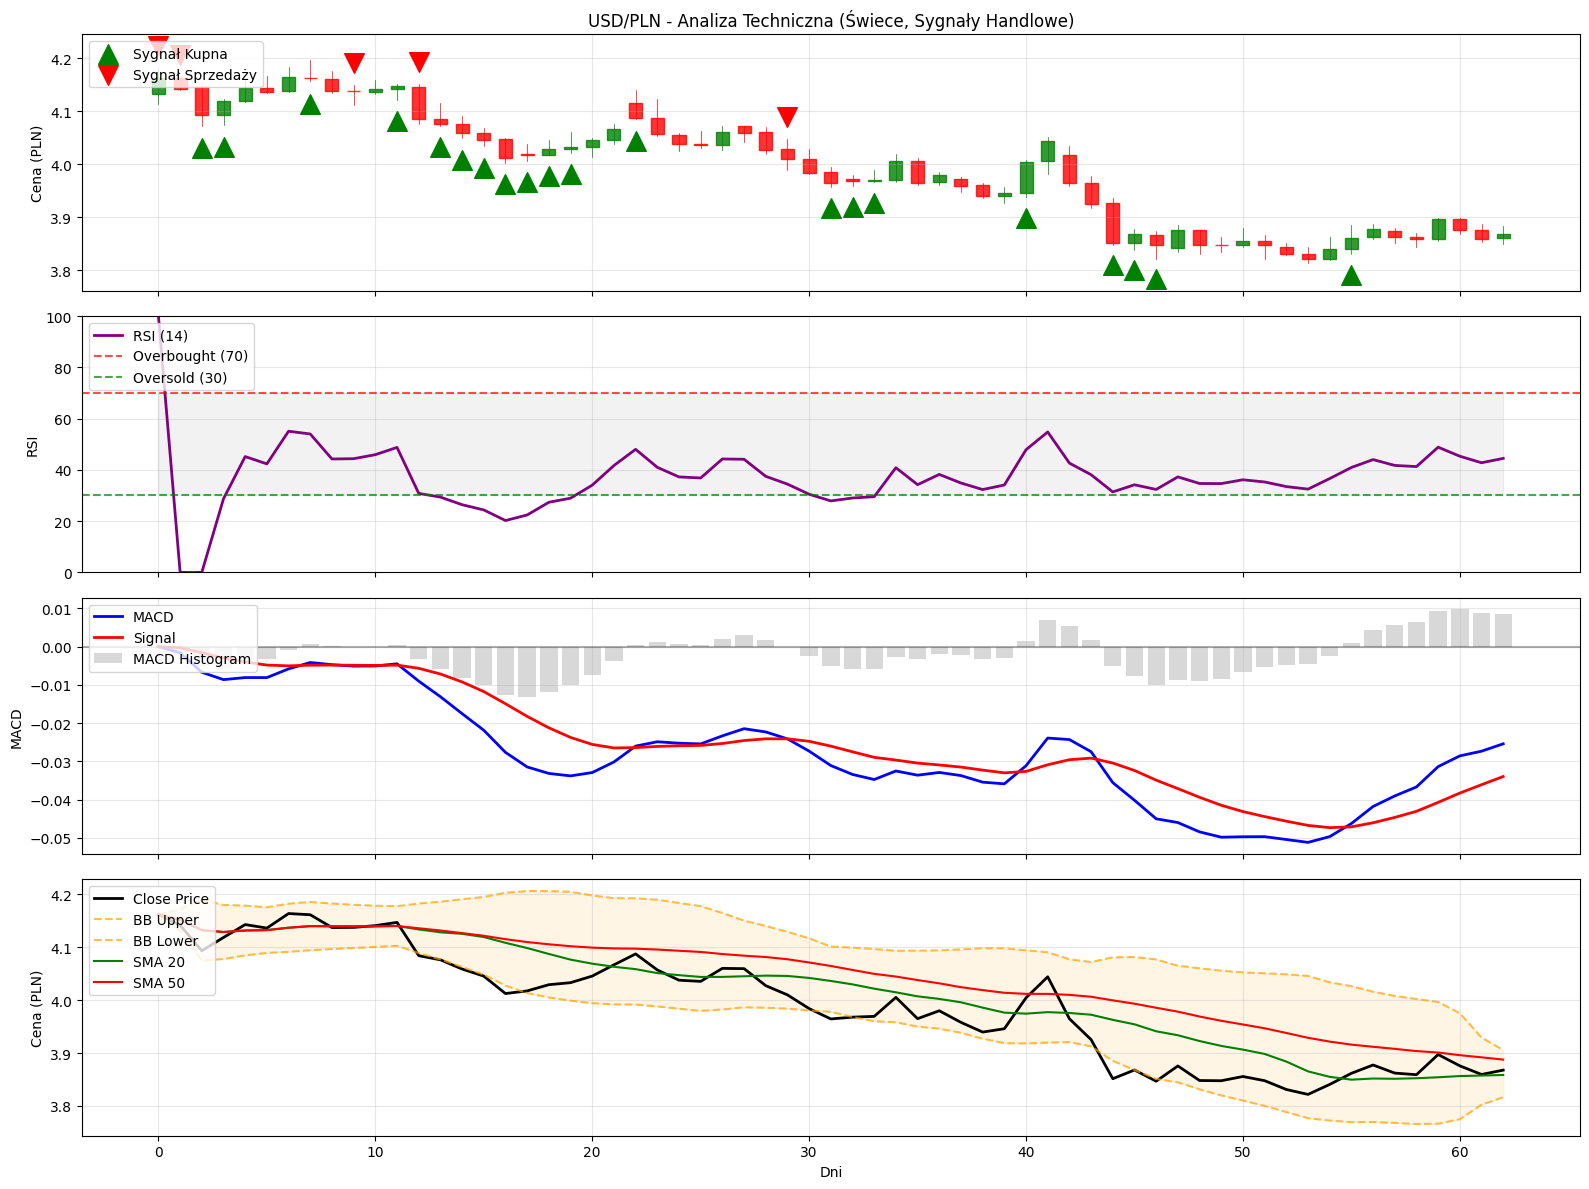

In [10]:
fig, axes = plt.subplots(4, 1, figsize=(16, 12), sharex=True)

# Przygotowanie danych dla mplfinance
ohlc_data = df[['Open', 'High', 'Low', 'Close']].copy()
ohlc_data['Volume'] = df['Volume']

# Wykres 1: Świece (candlesticks)
ax1 = axes[0]
for i in range(len(df)):
    open_p = df.iloc[i]['Open']
    close_p = df.iloc[i]['Close']
    high_p = df.iloc[i]['High']
    low_p = df.iloc[i]['Low']

    color = 'green' if close_p >= open_p else 'red'

    # Knot (wick)
    ax1.plot([i, i], [low_p, high_p], color=color, linewidth=0.5)

    # Ciało świecy
    body_height = abs(close_p - open_p)
    body_bottom = min(open_p, close_p)
    rect = Rectangle((i-0.3, body_bottom), 0.6, body_height,
                     facecolor=color, edgecolor=color, alpha=0.8)
    ax1.add_patch(rect)

# Dodaj sygnały na wykres świecowy
buy_signals = df[df['Signal'] == 1]
sell_signals = df[df['Signal'] == -1]

buy_indices = [df.index.get_loc(idx) for idx in buy_signals.index]
sell_indices = [df.index.get_loc(idx) for idx in sell_signals.index]

ax1.scatter(buy_indices, df.iloc[buy_indices]['Low'] * 0.99,
           marker='^', color='green', s=200, label='Sygnał Kupna', zorder=5)
ax1.scatter(sell_indices, df.iloc[sell_indices]['High'] * 1.01,
           marker='v', color='red', s=200, label='Sygnał Sprzedaży', zorder=5)

ax1.set_ylabel('Cena (PLN)')
ax1.set_title('USD/PLN - Analiza Techniczna (Świece, Sygnały Handlowe)')
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)

# Wykres 2: RSI
ax2 = axes[1]
ax2.plot(range(len(df)), df['momentum_rsi'], label='RSI (14)', color='purple', linewidth=2)
ax2.axhline(70, color='red', linestyle='--', alpha=0.7, label='Overbought (70)')
ax2.axhline(30, color='green', linestyle='--', alpha=0.7, label='Oversold (30)')
ax2.fill_between(range(len(df)), 30, 70, alpha=0.1, color='gray')
ax2.set_ylabel('RSI')
ax2.set_ylim(0, 100)
ax2.legend(loc='upper left')
ax2.grid(True, alpha=0.3)

# Wykres 3: MACD
ax3 = axes[2]
ax3.plot(range(len(df)), df['trend_macd'], label='MACD', color='blue', linewidth=2)
ax3.plot(range(len(df)), df['trend_macd_signal'], label='Signal', color='red', linewidth=2)
ax3.bar(range(len(df)), df['trend_macd_diff'], label='MACD Histogram', alpha=0.3, color='gray')
ax3.axhline(0, color='black', linestyle='-', alpha=0.3)
ax3.set_ylabel('MACD')
ax3.legend(loc='upper left')
ax3.grid(True, alpha=0.3)

# Wykres 4: Bollinger Bands + Moving Averages
ax4 = axes[3]
ax4.plot(range(len(df)), df['Close'], label='Close Price', color='black', linewidth=2)
ax4.plot(range(len(df)), df['volatility_bbh'], label='BB Upper', color='orange', linestyle='--', alpha=0.7)
ax4.plot(range(len(df)), df['volatility_bbl'], label='BB Lower', color='orange', linestyle='--', alpha=0.7)
ax4.fill_between(range(len(df)), df['volatility_bbl'], df['volatility_bbh'], alpha=0.1, color='orange')
ax4.plot(range(len(df)), df['trend_sma_fast'], label='SMA 20', color='green', linewidth=1.5)
ax4.plot(range(len(df)), df['trend_sma_slow'], label='SMA 50', color='red', linewidth=1.5)
ax4.set_ylabel('Cena (PLN)')
ax4.set_xlabel('Dni')
ax4.legend(loc='upper left')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('technical_analysis_candlestick.png', dpi=300, bbox_inches='tight')
print("Wykres zapisany: technical_analysis_candlestick.png")
plt.show()

###  PODSUMOWANIE I INTERPRETACJA

In [11]:
print("\n" + "="*80)
print("INTERPRETACJA ANALIZY TECHNICZNEJ")
print("="*80)

print(f"\nDane: USD/PLN (2025)")
print(f"Okres: {df.index[0].date()} do {df.index[-1].date()}")
print(f"Liczba dni: {len(df)}")
print(f"Cena początkowa: {df['Close'].iloc[0]:.4f} PLN")
print(f"Cena końcowa: {df['Close'].iloc[-1]:.4f} PLN")
print(f"Zmiana: {((df['Close'].iloc[-1] - df['Close'].iloc[0]) / df['Close'].iloc[0] * 100):.2f}%")

print(f"\nWykonane sygnały:")
print(f"  - Sygnały KUPNA: {len(df[df['Signal'] == 1])}")
print(f"  - Sygnały SPRZEDAŻY: {len(df[df['Signal'] == -1])}")

# Ostatnie wartości wskaźników
print(f"\nAktualne wskaźniki (ostatni dzień):")
print(f"  - RSI: {df['momentum_rsi'].iloc[-1]:.2f} ", end='')
if df['momentum_rsi'].iloc[-1] > 70:
    print("(OVERBOUGHT - sugeruje sprzedaż)")
elif df['momentum_rsi'].iloc[-1] < 30:
    print("(OVERSOLD - sugeruje kupno)")
else:
    print("(NEUTRALNY)")

print(f"  - MACD: {df['trend_macd'].iloc[-1]:.6f}")
print(f"  - MACD Signal: {df['trend_macd_signal'].iloc[-1]:.6f}")
if df['trend_macd'].iloc[-1] > df['trend_macd_signal'].iloc[-1]:
    print("    → Sygnał BYCZY (tendencja wzrostowa)")
else:
    print("    → Sygnał NIEDŹWIEDZI (tendencja spadkowa)")

print(f"  - Cena vs. Bollinger Bands:")
if df['Close'].iloc[-1] > df['volatility_bbh'].iloc[-1]:
    print("    → Cena POWYŻEJ górnego pasma (potencjalna sprzedaż)")
elif df['Close'].iloc[-1] < df['volatility_bbl'].iloc[-1]:
    print("    → Cena PONIŻEJ dolnego pasma (potencjalne kupno)")
else:
    print("    → Cena w środku pasm (neutralny)")

print(f"  - Moving Averages:")
if df['trend_sma_fast'].iloc[-1] > df['trend_sma_slow'].iloc[-1]:
    print("    → Golden Cross (trend wzrostowy)")
else:
    print("    → Death Cross (trend spadkowy)")


INTERPRETACJA ANALIZY TECHNICZNEJ

Dane: USD/PLN (2025)
Okres: 2025-01-02 do 2025-03-31
Liczba dni: 63
Cena początkowa: 4.1620 PLN
Cena końcowa: 3.8678 PLN
Zmiana: -7.07%

Wykonane sygnały:
  - Sygnały KUPNA: 20
  - Sygnały SPRZEDAŻY: 5

Aktualne wskaźniki (ostatni dzień):
  - RSI: 44.45 (NEUTRALNY)
  - MACD: -0.025403
  - MACD Signal: -0.033944
    → Sygnał BYCZY (tendencja wzrostowa)
  - Cena vs. Bollinger Bands:
    → Cena w środku pasm (neutralny)
  - Moving Averages:
    → Death Cross (trend spadkowy)
